In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qiskit_optimization.applications import Tsp

In [13]:
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


distance
 [[ 0. 13. 71.]
 [13.  0. 62.]
 [71. 62.  0.]]


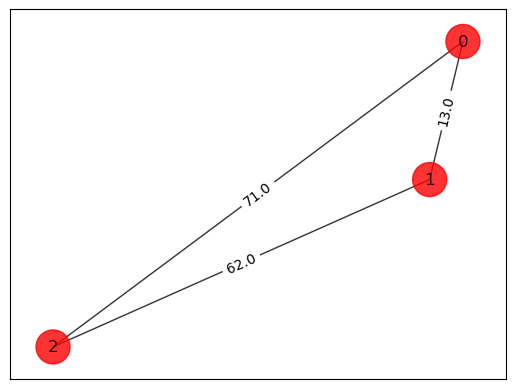

In [43]:
# Generating a graph of 3 nodes
num_nodes = 3
num_qubits = num_nodes**2
tsp = Tsp.create_random_instance(num_nodes, seed=1234)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

## Generating tsp Instances

In [16]:
import numpy as np

def generate_tsp_instance(num_nodes):
    # Generate random coordinates for each node
    coordinates = np.random.rand(num_nodes, 2)  # 2D coordinates
    
    # Calculate distances between nodes
    distances = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                distances[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])  # Euclidean distance
    
    return coordinates, distances


### Brute force method

In [23]:
# Simulating with a brute force method
from itertools import permutations


def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
#             print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order



##### Partial Permutation matrix of the solution

In [18]:
import numpy as np

def partial_permutation_matrix(num_nodes, indices):
    
    P = np.eye(num_nodes)
    P = P[:, indices]
    return P

# Example usage:
# n = 3  # Size of the permutation matrix
# indices = [0, 1, 2]  # Indices specifying the permutation
# P_partial = partial_permutation_matrix(n, indices)
# print("Partial Permutation Matrix:")
# print(P_partial)

In [26]:
coordinates, adj_matrix = generate_tsp_instance(num_nodes)
best_distance, best_order= brute_force_tsp(adj_matrix, num_nodes)

(0, 3, 1, 2)


###### Looping for more solutions

In [27]:
for i in range(5):
    coordinates, adj_matrix = generate_tsp_instance(num_nodes)
    best_distance, best_order= brute_force_tsp(adj_matrix, num_nodes)
    print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
    )
    P_partial = partial_permutation_matrix(num_nodes, list(best_order))
    print('partial permutation matrix \n', P_partial)

Best order from brute force = (0, 1, 3, 2) with total distance = 0.8731185332937081
partial permutation matrix 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Best order from brute force = (0, 1, 2, 3) with total distance = 1.335547569263313
partial permutation matrix 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Best order from brute force = (0, 3, 2, 1) with total distance = 2.1712623512699896
partial permutation matrix 
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Best order from brute force = (0, 1, 3, 2) with total distance = 1.6328640750451315
partial permutation matrix 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Best order from brute force = (0, 2, 1, 3) with total distance = 1.2277174418685157
partial permutation matrix 
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


#### Draw Tsp solution

In [11]:
def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)

# draw_tsp_solution(tsp.graph, best_order, colors, pos)

In [25]:
!git add .
!git commit -m "Your commit message"

[main 9d798e7] Your commit message
 5 files changed, 736 insertions(+), 272 deletions(-)
 create mode 100644 .ipynb_checkpoints/TSP_simulation_classically-checkpoint.ipynb
 create mode 100644 TSP_simulation_classically.ipynb


In [26]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git
   d8dfa5b..9d798e7  main -> main


#### Adding the data to and Excel Sheet

In [47]:
import os
import numpy as np
import openpyxl 


path = 'C:\\Users\\LENOVO\\OneDrive - National University of Sciences & Technology\\Academia\\FYP\\TSP-3.xlsx'

# wb = openpyxl.load_workbook(path)
# wb =openpyxl.Workbook()
# ws = wb.active

ws1 = wb.create_sheet(title = 'Testing data')
ws.append(['Adjaceny Matrix', 'Best Order', 'Best Distance', 'Partial Permutation Matrix'])
for i in range(1500):
    coordinates, adj_matrix = generate_tsp_instance(num_nodes)
    best_distance, best_order= brute_force_tsp(adj_matrix, num_nodes)
    P_partial = partial_permutation_matrix(num_nodes, list(best_order))
    
    # Convert the matrix to a string representation
    adj_matrix1 = np.array2string(adj_matrix, separator=',')
    P_partial1 = np.array2string(P_partial, separator=',')
    
    
    data_append = [adj_matrix1, str(best_order), best_distance, P_partial1]
    ws.append(data_append)


wb.save(path)